### loading the libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## loading the data set

In [2]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


| Column                     | Meaning                                             |
| -------------------------- | --------------------------------------------------- |
| person_age                 | Age of customer                                     |
| person_income              | Annual income                                       |
| person_home_ownership      | RENT / OWN / MORTGAGE                               |
| person_emp_length          | Employment length (years)                           |
| loan_intent                | Purpose of loan (education, medical, personal etc.) |
| loan_grade                 | Credit grade                                        |
| loan_amnt                  | Loan amount                                         |
| loan_int_rate              | Interest rate                                       |
| loan_status                | Target variable (0 or 1)                            |
| loan_percent_income        | Loan amount relative to income                      |
| cb_person_default_on_file  | Previous default (Y/N)                              |
| cb_person_cred_hist_length | Credit history length                               |


In [3]:
df.shape

(32581, 12)

`observation`
- data set have 32581 rows and 12 columns

In [4]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [5]:
df['loan_status'].nunique()

2

In [6]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

`observation`
- in dataset 
- person_emp_length
- loan_int_rate 
- have an missing value so we are treating them.

In [9]:
df.isna().sum()/len(df)*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [10]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)


In [11]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
df.duplicated().sum()

165

`observation`
- data set have 165 duplicates we are removing them.

In [13]:
df = df.drop_duplicates()


In [14]:
df.duplicated().sum()

0

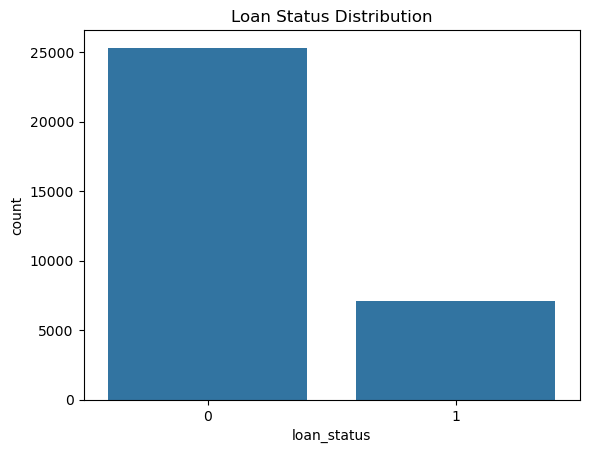

In [15]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()


`observation`
- target variable loan_status have  
- loan_status
- 0    :- 25473
- 1    :-  7108

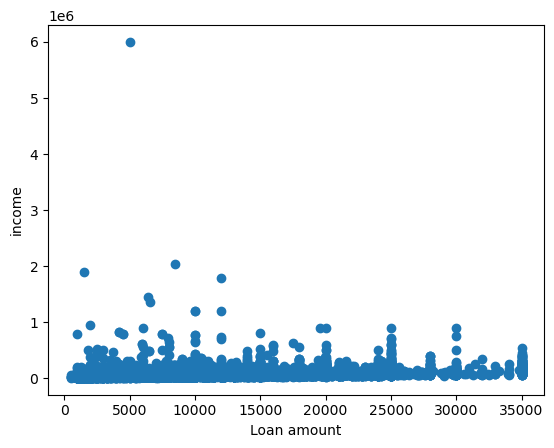

In [16]:
plt.scatter(df['loan_amnt'],df['person_income'])
plt.xlabel("Loan amount")
plt.ylabel("income")
plt.show()


                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173293           0.161342   
person_income                 0.173293       1.000000           0.134791   
person_emp_length             0.161342       0.134791           1.000000   
loan_amnt                     0.050680       0.265947           0.113934   
loan_int_rate                 0.011074       0.000826          -0.051462   
loan_status                  -0.022698      -0.145005          -0.082517   
loan_percent_income          -0.042300      -0.254472          -0.054024   
cb_person_cred_hist_length    0.859215       0.117614           0.143251   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050680       0.011074    -0.022698   
person_income                0.265947       0.000826    -0.145005   
person_emp_length            0.113934      -0.051462    -0.082517   
loan_amnt                    1.000000  

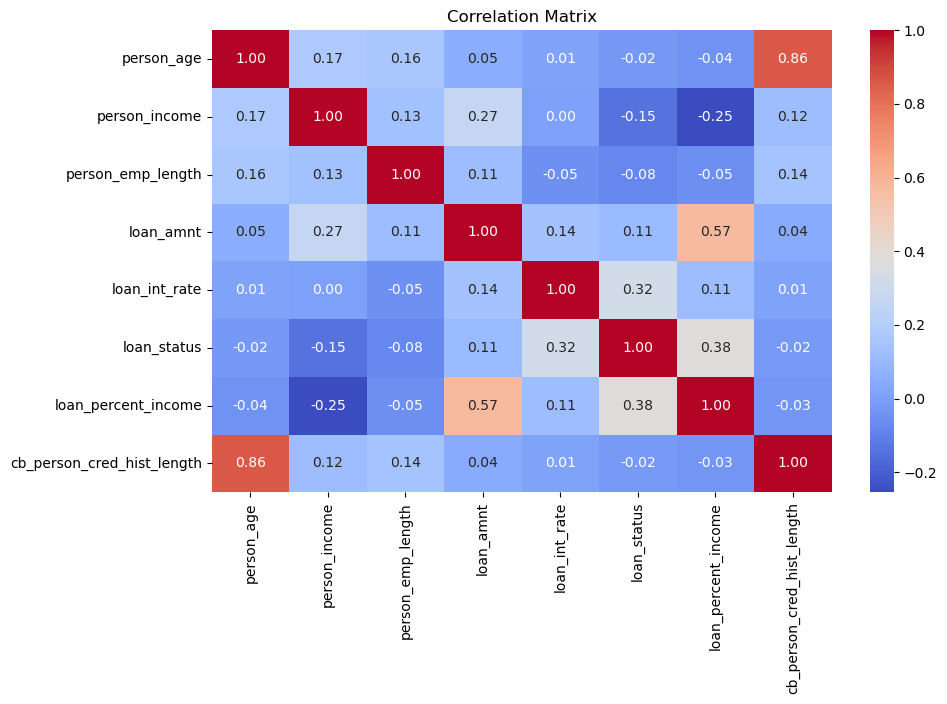

In [17]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()
print(corr_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## data preparation

- encoding categorical variable

In [18]:
le = LabelEncoder()

df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])


In [19]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


### seprate feature and target

In [20]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

### Train Test Split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(25932, 11)

In [23]:
X_test.shape

(6484, 11)

## Scaling data

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## applying SMOTE FOR Imbalance data

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


`observation`
-train model on  ( X_train_res, y_train_res)

- evaluation on
- X_test_scaled

## Building Model

- KNN classification

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

- Lostistic classification

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000)

- svm classification

In [28]:
svm = SVC()
svm.fit(X_train_res, y_train_res)

SVC()

- Decision Tree Classification

In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)


DecisionTreeClassifier(random_state=42)

- Random Forest Classification

In [34]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

## Evaluation matrix

- Knn model 

In [29]:
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7995064774830352
[[4110  963]
 [ 337 1074]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5073
           1       0.53      0.76      0.62      1411

    accuracy                           0.80      6484
   macro avg       0.73      0.79      0.74      6484
weighted avg       0.84      0.80      0.81      6484



- logistic regression

In [30]:
y_pred_lr= lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7871684145589143
[[4011 1062]
 [ 318 1093]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      5073
           1       0.51      0.77      0.61      1411

    accuracy                           0.79      6484
   macro avg       0.72      0.78      0.73      6484
weighted avg       0.84      0.79      0.80      6484



- svc classifier

In [31]:
y_pred_svc = svm.predict(X_test_scaled)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.8587291795188156
[[4521  552]
 [ 364 1047]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5073
           1       0.65      0.74      0.70      1411

    accuracy                           0.86      6484
   macro avg       0.79      0.82      0.80      6484
weighted avg       0.87      0.86      0.86      6484



- DT classifier

In [35]:
y_pred_dt = dt.predict(X_test_scaled)

print("Decission Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decission Tree Accuracy: 0.8752313386798273
[[4588  485]
 [ 324 1087]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      5073
           1       0.69      0.77      0.73      1411

    accuracy                           0.88      6484
   macro avg       0.81      0.84      0.82      6484
weighted avg       0.88      0.88      0.88      6484



- Random Forest Classifier

In [36]:
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9275138803207896
[[4995   78]
 [ 392 1019]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5073
           1       0.93      0.72      0.81      1411

    accuracy                           0.93      6484
   macro avg       0.93      0.85      0.88      6484
weighted avg       0.93      0.93      0.92      6484



**`observation from evaluation matrix results`**

| Model         | Accuracy | F1 (class 1) |
| ------------- | -------- | ------------ |
| KNN           | 0.80     | 0.62         |
| Logistic      | 0.79     | 0.61         |
| SVM           | 0.86     | 0.70         |
| Decision Tree | 0.88     | 0.73         |
| Random Forest | 0.93     | 0.81         |


- conclusion
- Among all models tested, **Random Forest achieved the highest accuracy** and F1-score, making it the most suitable model for predicting loan risk.
- Decision Tree and SVM also performed well, while Logistic Regression and KNN showed comparatively lower performance.

## saving a pkl file for further strealit sprint and deployment

In [37]:
import joblib

joblib.dump(rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

- pkl file is saved now
- to increase the accuracy of rf we trying hyper parameter tunning

## Hyper parameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf2,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)

print("Best Parameters:", grid_search.best_params_)


In [ ]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
